<a href="https://colab.research.google.com/github/yangxu21/ML_summary/blob/main/K_mean_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Ingest**

In [44]:
import pandas as pd
import numpy as np
team_data = "https://raw.githubusercontent.com/noahgift/socialpowernba/master/data/nba_2017_att_val_elo_win_housing.csv"
val_housing_win_df = pd.read_csv(team_data)
numerical_df = val_housing_win_df.loc[:,["TOTAL_ATTENDANCE_MILLIONS", "ELO", "VALUE_MILLIONS", "MEDIAN_HOME_PRICE_COUNTY_MILLIONS"]]
numerical_df.head()

,TOTAL_ATTENDANCE_MILLIONS,ELO,VALUE_MILLIONS,MEDIAN_HOME_PRICE_COUNTY_MILLIONS
0,0.888882,1519,2500,269900.0
1,0.811366,1420,1450,314990.0
2,0.721928,1393,1075,343950.0
3,0.805400,1569,1350,389000.0
4,0.813050,1600,1125,390000.0


In [41]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data',
    sep = '\s+',
    header=None)
df.head()

            0     1     2     3    4     5     6     7   8
0   AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35  cp
1  ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44  cp
2  ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46  cp
3  ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36  cp
4   ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35  cp


##**Standardization**

*   Using preprocessing in **sklearn**
*   Recommand to use **Pipeline**



In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# Fit to data and predict using pipelined scaling, KMeans.
std_clf = make_pipeline(StandardScaler(), KMeans(n_clusters=3))
kmeans = std_clf.fit(numerical_df)

## or use pipeline (with naming the estimators)
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=3))])
kmeans1 = pipe.fit(numerical_df)

print(kmeans1.named_steps) # Access the steps by name.
print(kmeans1.n_features_in_) # Number of features seen during first step fit method.

# Fit to data and predict without pipeline
k_means2 = KMeans(n_clusters=3)
scaler = StandardScaler()
scaler.fit(numerical_df)
kmeans2_result = k_means2.fit(scaler.transform(numerical_df))

print(kmeans2_result.cluster_centers_) # Coordinates of cluster centers.
print(kmeans2_result.inertia_) # Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
print(kmeans2_result.labels_) # Labels of each point.
print(kmeans2_result.n_iter_) # Number of iterations run.
print(kmeans2_result.n_features_in_) # Number of features seen during fit.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'scaler': StandardScaler(), 'kmeans': KMeans(n_clusters=3)}
4
[[-0.84876222 -0.60018123 -0.59888401 -0.31245746]
 [ 0.72882816  0.7828648   0.23141105 -0.05693605]
 [ 0.83953843 -1.27878494  2.57231074  2.58575455]]
50.385210800016274
[1 1 0 1 1 1 1 1 1 2 1 2 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0]
2
4


##**Encode the labels into unique integers**

In [54]:
from sklearn.preprocessing import LabelEncoder
y = (df.iloc[:,-1:])
encoder = LabelEncoder()
y = encoder.fit_transform(np.ravel(y))
print(encoder.classes_)
print(encoder.transform(encoder.classes_))
print(encoder.inverse_transform([2,3]))

encoder_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(encoder_mapping)

['cp' 'im' 'imL' 'imS' 'imU' 'om' 'omL' 'pp']
[0 1 2 3 4 5 6 7]
['imL' 'imS']
{'cp': 0, 'im': 1, 'imL': 2, 'imS': 3, 'imU': 4, 'om': 5, 'omL': 6, 'pp': 7}


##K-means diagnostics

* Elbow plot
* Silhouettee analysis
* Intercluster distance map

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

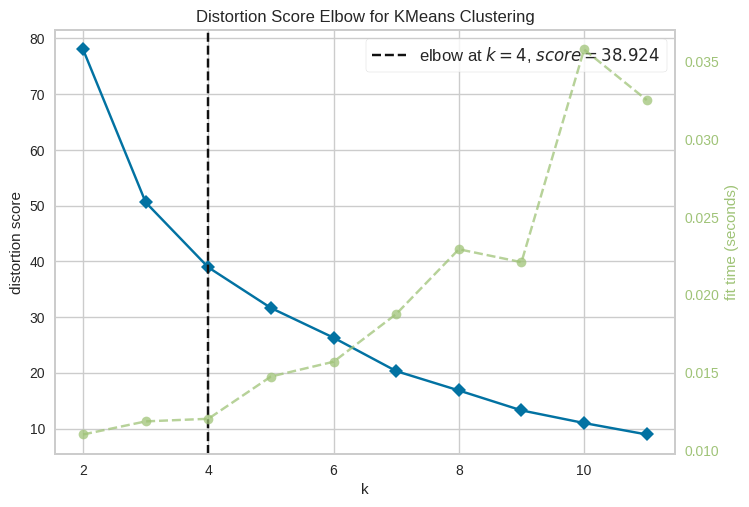

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
# Elbow plot using yellowbrick

from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
scaler = StandardScaler()
visualizer = KElbowVisualizer(model, k=(2,12))

scaler.fit(numerical_df)
visualizer.fit(scaler.transform(numerical_df))
visualizer.poof()

### Elbow method calculates the average distance from centroid for each value

In [11]:
# Elbow plot (from scratch)

import matplotlib.pyplot as plt
km = KMeans(n_clusters=4,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
km.fit(scaler.transform(numerical_df))

[[ 0.60095823  0.62701713 -0.23195707 -0.25456001]
 [-0.84876222 -0.60018123 -0.59888401 -0.31245746]
 [ 1.07396297 -1.24546672  2.78730699  4.43866857]
 [ 0.95982517  0.67556654  1.58332797  0.4962672 ]]
